In [1]:
import pandas as pd
import numpy as np
import folium
from IPython.display import HTML, display
import matplotlib.pyplot as plt

In [2]:
# data = pd.read_csv('./data/01/AIS_2017_01_01.csv')

In [3]:
# data.head()

In [4]:
# data[data['MMSI'] == 367602060]

In [5]:
# print(max(data['SOG']), min(data['SOG']))

In [6]:
# print(max(data['COG']), min(data['COG']))

In [3]:
zone10 = pd.read_csv('./data/01/AIS_ASCII_by_UTM_Month/2017_v2/AIS_2017_01_Zone10.csv')

In [8]:
# zone10.info(memory_usage='deep')

In [9]:
zone10.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,367114690,2017-01-01T00:00:06,48.51094,-122.60705,0.0,-49.6,511.0,NaN,NaN,NaN,NaN,under way using engine,NaN,NaN,NaN,NaN
1,367479990,2017-01-01T00:00:03,48.15891,-122.67268,0.1,10.1,353.0,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,moored,83.39,19.5,3.2,NaN
2,368319000,2017-01-01T00:00:08,43.34576,-124.32142,0.0,32.8,173.0,NaN,NaN,NaN,NaN,engaged in fishing,NaN,NaN,NaN,NaN
3,367154100,2017-01-01T00:00:15,46.74264,-124.93125,6.8,6.0,352.0,NaN,NaN,NaN,NaN,undefined,NaN,NaN,NaN,NaN
4,367446870,2017-01-01T00:00:59,48.51320,-122.60718,0.0,23.2,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# zone10[(zone10['LAT'] >= 45) & (zone10['LAT'] <= 50)]

In [11]:
# (zone10['LAT'] >= 45) & (zone10['LAT'] <= 50)

In [4]:
LAT = (zone10['LAT'] >= 45) & (zone10['LAT'] <= 50)
LON = (zone10['LON'] >= -126) & (zone10['LON'] <= -122)

In [5]:
fuca = zone10[LAT & LON]

In [6]:
del(zone10)

In [15]:
fuca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23920149 entries, 0 to 29994796
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   MMSI          int64  
 1   BaseDateTime  object 
 2   LAT           float64
 3   LON           float64
 4   SOG           float64
 5   COG           float64
 6   Heading       float64
 7   VesselName    object 
 8   IMO           object 
 9   CallSign      object 
 10  VesselType    float64
 11  Status        object 
 12  Length        float64
 13  Width         float64
 14  Draft         float64
 15  Cargo         float64
dtypes: float64(10), int64(1), object(5)
memory usage: 3.0+ GB


In [16]:
fuca.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,367114690,2017-01-01T00:00:06,48.51094,-122.60705,0.0,-49.6,511.0,NaN,NaN,NaN,NaN,under way using engine,NaN,NaN,NaN,NaN
1,367479990,2017-01-01T00:00:03,48.15891,-122.67268,0.1,10.1,353.0,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,moored,83.39,19.5,3.2,NaN
3,367154100,2017-01-01T00:00:15,46.74264,-124.93125,6.8,6.0,352.0,NaN,NaN,NaN,NaN,undefined,NaN,NaN,NaN,NaN
4,367446870,2017-01-01T00:00:59,48.51320,-122.60718,0.0,23.2,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,367750760,2017-01-01T00:01:04,47.62984,-122.33168,0.1,141.7,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# stopping behavior detection에 사용하는 최소 길이를 ship length 로 사용하기 때문에 length가 nan인 것은 제거
LEN = ~fuca['Length'].isna()

In [8]:
fuca = fuca[LEN]

In [19]:
fuca

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
1,367479990,2017-01-01T00:00:03,48.15891,-122.67268,0.1,10.1,353.0,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,moored,83.39,19.50,3.2,NaN
10,367585430,2017-01-01T00:00:12,48.51293,-122.60735,0.0,-101.2,511.0,MAKARIOS,NaN,WDG9205,1019.0,NaN,18.11,5.10,NaN,NaN
11,316021351,2017-01-01T00:00:00,49.29479,-123.13286,0.0,-118.3,511.0,BRITANNIA,IMO8120650,VY5348,1012.0,under way using engine,38.41,9.76,2.8,60.0
13,367536390,2017-01-01T00:00:39,48.68218,-123.40237,0.0,82.1,511.0,APRIL LOON II,NaN,WDG4420,1019.0,NaN,14.94,4.70,NaN,NaN
14,316005771,2017-01-01T00:00:47,48.95017,-125.55641,0.0,-94.6,511.0,WESTERN INVESTOR,IMO7927788,VG6273,1001.0,NaN,24.06,7.17,2.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994780,367420850,2017-01-31T23:42:40,47.63768,-122.33877,0.0,-49.6,88.0,SPIRIT,NaN,WDE9749,1019.0,moored,16.95,5.10,NaN,37.0
29994782,316028652,2017-01-31T23:43:59,49.20391,-123.14538,-0.1,-49.6,309.0,NEW FRONTIER,NaN,NaN,1019.0,under way using engine,19.08,5.90,1.4,37.0
29994788,316028652,2017-01-31T23:51:20,49.20389,-123.14539,-0.1,-49.6,305.0,NEW FRONTIER,NaN,NaN,1019.0,under way using engine,19.08,5.90,1.4,37.0
29994789,316028652,2017-01-31T23:52:41,49.20391,-123.14539,-0.1,-49.6,307.0,NEW FRONTIER,NaN,NaN,1019.0,under way using engine,19.08,5.90,1.4,37.0


In [9]:
fuca.reset_index(drop=True, inplace=True)

In [10]:
fuca.to_csv('./data/fuca_1.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
import folium
from IPython.display import HTML, display
import matplotlib.pyplot as plt

In [2]:
fuca = pd.read_csv('./data/fuca_1.csv')

In [3]:
mmsi = set(fuca['MMSI'])

In [4]:
len(mmsi)

2364

In [5]:
fuca[fuca['MMSI'] == list(mmsi)[55]].head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
5244765,235102466,2017-01-09T06:47:00,46.02752,-125.70759,10.8,78.0,78.0,GALILEO,IMO9698317,2HCI4,1004.0,under way using engine,199.93,32.3,13.3,NaN
5246697,235102466,2017-01-09T06:41:50,46.02447,-125.72924,10.7,77.0,79.0,GALILEO,IMO9698317,2HCI4,1004.0,under way using engine,199.93,32.3,13.3,NaN
5248534,235102466,2017-01-09T06:45:22,46.02658,-125.71445,10.6,78.8,79.0,GALILEO,IMO9698317,2HCI4,1004.0,under way using engine,199.93,32.3,13.3,NaN
5249572,235102466,2017-01-09T07:01:22,46.03663,-125.64776,10.8,78.1,79.0,GALILEO,IMO9698317,2HCI4,1004.0,under way using engine,199.93,32.3,13.3,NaN
5250812,235102466,2017-01-09T06:56:00,46.03329,-125.67010,10.6,79.4,80.0,GALILEO,IMO9698317,2HCI4,1004.0,under way using engine,199.93,32.3,13.3,NaN


In [6]:
lat_mean = fuca['LAT'].mean()
lon_mean = fuca['LON'].mean()
print(lat_mean, lon_mean)

47.898751236716635 -122.95791277601879


In [7]:
# make array of tuples(tuple contain latitudes & longitudes)
# lats_long = []
# for i in range(len(fuca)):
#     lats_long.append((fuca['LAT'][i], fuca['LON'][i]))
#
# print(len(lats_long))

In [8]:
# create folium map with markers
# import folium
# mapit = folium.Map( location=[lat_mean, lon_mean], zoom_start=8 )
# for coord in temp_lat_lon:
#     folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=3 ).add_to( mapit )
#
# mapit.save('map.html')

In [9]:
# display map
from IPython.display import HTML, display
# display(mapit)

In [10]:
temp_lat_lon = []
temp = fuca[fuca['MMSI'] == list(mmsi)[564]].reset_index(drop=True)
for i in range(len(temp)):
    temp_lat_lon.append((temp['LAT'][i], temp['LON'][i]))

In [11]:
mapit = folium.Map( location=[temp['LAT'].mean(), temp['LON'].mean()], zoom_start=9 )
for coord in temp_lat_lon:
    folium.Circle( location=[ coord[0], coord[1] ], color='green', radius=3 ).add_to( mapit )

mapit.save('map.html')

In [12]:
entire_map = folium.Map( location=[lat_mean, lon_mean], zoom_start=7 )
folium.Rectangle(bounds=[[fuca['LAT'].min(), fuca['LON'].min()],
                           [fuca['LAT'].min(), fuca['LON'].max()],
                           [fuca['LAT'].max(), fuca['LON'].min()],
                           [fuca['LAT'].max(), fuca['LON'].max()]], color='#ff7800', fill=True, fill_color='#ffff00').add_to(entire_map)
# folium.PolyLine(locations=[fuca['LAT'].min(), fuca['LON'].max()], color='blue').add_to(entire_map)
# folium.PolyLine(locations=[fuca['LAT'].max(), fuca['LON'].min()], color='blue').add_to(entire_map)
# folium.PolyLine(locations=[fuca['LAT'].max(), fuca['LON'].max()], color='blue').add_to(entire_map)

entire_map.save('entire_map.html')

In [13]:
fuca.isnull().any()

MMSI            False
BaseDateTime    False
LAT             False
LON             False
SOG             False
COG             False
Heading         False
VesselName      False
IMO              True
CallSign         True
VesselType       True
Status           True
Length          False
Width            True
Draft            True
Cargo            True
dtype: bool

In [14]:
# put all columns in a list that contain missing values

missing_values_columns = fuca.columns[fuca.isnull().any()].tolist()
missing_values_columns

['IMO', 'CallSign', 'VesselType', 'Status', 'Width', 'Draft', 'Cargo']

In [15]:
count_missing_values = []
for i in missing_values_columns:
    count = fuca[i].isnull().sum()
    count_missing_values.append(count)


missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

,Column name,Missing Value Count
0,IMO,9452772
1,CallSign,2680912
2,VesselType,973242
3,Status,5000956
4,Width,3575399
5,Draft,9790128
6,Cargo,12288715


In [16]:
fuca['MMSI'].value_counts()

367098550    41893
367384780    41314
367530080    41193
366772750    40771
366773030    40606
             ...  
367774000        1
316013966        1
316026345        1
367733390        1
367376170        1
Name: MMSI, Length: 2364, dtype: int64

In [23]:
temp_lat_lon = []
temp = fuca[fuca['MMSI'] == 367098550].reset_index(drop=True)
for i in range(len(temp)):
    temp_lat_lon.append((temp['LAT'][i], temp['LON'][i]))

In [116]:
len(temp_lat_lon)

40606

In [25]:
mapit = folium.Map(location=[temp['LAT'].mean(), temp['LON'].mean()], zoom_start=9)
for coord in temp_lat_lon:
    folium.Circle(location=[coord[0], coord[1]], color='green', radius=3).add_to(mapit)

mapit.save('map.html')

In [26]:
temp

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,367098550,2017-01-01T00:03:23,46.20149,-123.38747,0.0,-106.1,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
1,367098550,2017-01-01T00:04:24,46.20152,-123.38744,0.0,0.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
2,367098550,2017-01-01T00:02:21,46.20150,-123.38747,0.0,-111.3,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
3,367098550,2017-01-01T00:01:20,46.20148,-123.38745,0.0,0.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
4,367098550,2017-01-01T00:06:32,46.20154,-123.38746,0.0,0.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41888,367098550,2017-01-31T23:28:52,46.20162,-123.38735,0.0,-50.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
41889,367098550,2017-01-31T23:29:53,46.20164,-123.38735,0.0,6.9,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
41890,367098550,2017-01-31T23:31:00,46.20162,-123.38732,0.0,1.6,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN
41891,367098550,2017-01-31T23:47:44,46.20163,-123.38736,0.0,0.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN


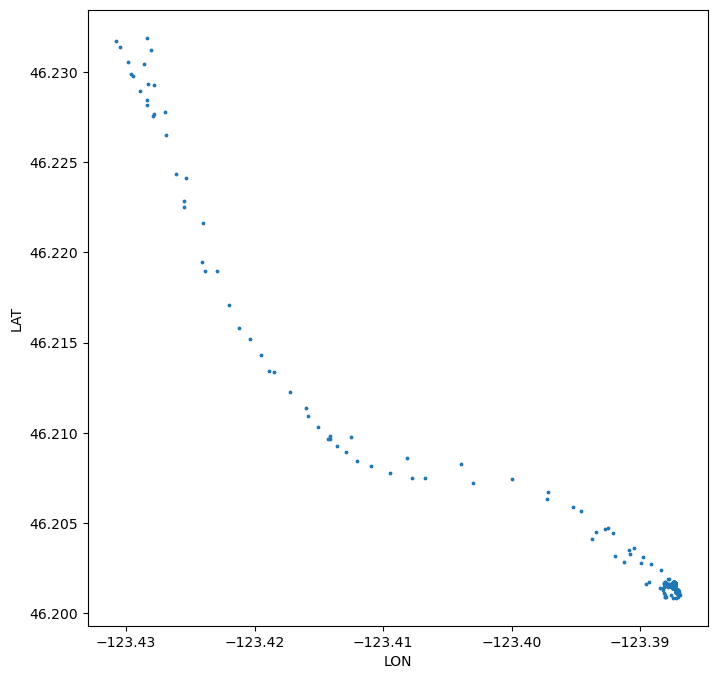

In [24]:
temp.plot(kind='scatter', x='LON', y='LAT', figsize=(8,8), s=3)
plt.show()

In [28]:
del(rec1)
del(moving)
del(stop)

# stopping behavior detection 구현

In [4]:
from sklearn.cluster import DBSCAN

In [3]:
rec1 = fuca[fuca['MMSI'] == 367384780].sort_values('BaseDateTime', ascending=True)

In [4]:
rec1

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
1812,367384780,2017-01-01T00:00:01,46.08986,-122.92898,0.0,-184.3,105.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
95,367384780,2017-01-01T00:01:02,46.08986,-122.92899,0.0,-157.0,104.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
96,367384780,2017-01-01T00:02:03,46.08986,-122.92899,0.0,4.0,104.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
1834,367384780,2017-01-01T00:03:13,46.08986,-122.92899,0.0,188.8,104.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
1866,367384780,2017-01-01T00:04:15,46.08986,-122.92899,0.1,-177.7,103.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865048,367384780,2017-01-31T23:55:09,45.65542,-122.75512,0.0,-109.9,150.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
20500968,367384780,2017-01-31T23:56:19,45.65543,-122.75511,0.0,-52.7,149.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
19854045,367384780,2017-01-31T23:57:20,45.65542,-122.75512,0.0,199.9,149.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0
19852456,367384780,2017-01-31T23:58:21,45.65541,-122.75513,0.0,-189.6,150.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0


In [58]:
min_samples = 3
eps_km = rec1['Length'].min() * 0.001 # 0.5
dbscan_model = DBSCAN(eps=eps_km/111.32, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
rec1['cluster'] = dbscan_model.fit_predict(rec1[['LAT', 'LON']].values)

In [59]:
rec1['cluster'].unique()

array([  0,   1,   2, 365,  -1,   3,   4,   5, 396,   6, 395,   7,   8,
        18, 264, 143,   9,  10,  11, 416,  12,  13,  14, 441,  15,  16,
        17, 271,  19,  20, 417,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38, 429,  39, 428,
       319,  40, 397,  41,  42,  43, 321,  44, 384, 413,  45,  46,  47,
        48,  49, 354, 353,  50,  51,  52, 435,  53, 330,  54,  55,  56,
       296,  57, 446,  58,  59,  60, 116, 115,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71, 406,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 200, 101, 352,
       102, 103, 104, 105, 106, 107, 108, 195, 109, 388, 110, 111, 112,
       113, 193, 437, 114, 436, 409, 411, 187, 186, 117, 118, 403, 254,
       313, 119, 120, 121, 122, 123, 124, 125, 126, 127, 431, 128, 129,
       130, 383, 131, 177, 132, 133, 378, 134, 135, 136, 137, 13

In [ ]:
moving = rec1[rec1['cluster'] == -1].reset_index(drop=True)

In [ ]:
moving

In [84]:
# temp_lat_lon = []
# for i in range(len(moving)):
#      temp_lat_lon.append((moving['LAT'][i], moving['LON'][i]))
# mapit = folium.Map(location=[moving['LAT'].mean(), moving['LON'].mean()], zoom_start=9)
# for coord in temp_lat_lon:
#     folium.Circle(location=[coord[0], coord[1]], color='green', radius=3).add_to(mapit)
#
# mapit.save('moving.html')

In [ ]:
stop = rec1[rec1['cluster'] != -1].reset_index(drop=True)

In [12]:
stop

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,cluster
0,367098550,2017-01-01T00:01:20,46.20148,-123.38745,0.0,0.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
1,367098550,2017-01-01T00:02:21,46.20150,-123.38747,0.0,-111.3,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
2,367098550,2017-01-01T00:03:23,46.20149,-123.38747,0.0,-106.1,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
3,367098550,2017-01-01T00:04:24,46.20152,-123.38744,0.0,0.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
4,367098550,2017-01-01T00:05:30,46.20150,-123.38743,0.0,-168.2,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41824,367098550,2017-01-31T23:49:51,46.20162,-123.38735,0.0,12.1,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
41825,367098550,2017-01-31T23:51:01,46.20161,-123.38736,0.0,15.4,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
41826,367098550,2017-01-31T23:52:03,46.20159,-123.38733,0.0,14.1,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0
41827,367098550,2017-01-31T23:53:04,46.20161,-123.38732,0.0,15.0,511.0,HEIDI L BRUSCO,IMO8628195,WDC9175,1025.0,under way using engine,35.79,9.45,3.1,NaN,0


In [ ]:
stop['cluster'].unique()

In [77]:
# temp_lat_lon = []
# for i in range(len(stop)):
#     temp_lat_lon.append((stop['LAT'][i], stop['LON'][i]))

In [78]:
# len(temp_lat_lon)

In [79]:
# mapit = folium.Map(location=[stop['LAT'].mean(), stop['LON'].mean()], zoom_start=9)
# for coord in temp_lat_lon:
#     folium.Circle(location=[coord[0], coord[1]], color='green', radius=3).add_to(mapit)
#
# mapit.save('stop.html')

In [14]:
stopping_points = []
for cluster_id in rec1['cluster'].unique():
    if cluster_id != -1:
        cluster = rec1[rec1['cluster'] == cluster_id]
        if len(cluster) >= 3:
            stopping_points.append((cluster['LAT'].mean(), cluster['LON'].mean()))

In [60]:
rec1['Length'].min() * 0.001

0.0238

In [5]:
import math

Dk = rec1['Length'].min() * 0.001 * 4.5

def is_stopping_point(prev, cur):
    a = prev[0] - cur['LAT']
    b = prev[1] - cur['LON']
    dist = math.sqrt((a*a + b*b)) * 111.32
    if dist < Dk:
        return True
    else:
        return False

In [6]:
moving_points = []
stopping_points = []
index = []
# for cluster_id in rec1['cluster'].unique():
    # if cluster_id != -1:
    # cluster = rec1[rec1['cluster'] == cluster_id].reset_index(drop=True)
cluster = rec1.reset_index(drop=True)
cur_loc = cluster.loc[0]
index.append(0)
moving_points.append((cur_loc['LAT'], cur_loc['LON']))
for i in range(len(cluster)):
    cur_loc = cluster.loc[i]
    prev_loc = moving_points[-1]
    if is_stopping_point(prev_loc, cur_loc):
        stopping_points.append((cur_loc['LAT'], cur_loc['LON']))
    else:
        moving_points.append((cur_loc['LAT'], cur_loc['LON']))
        index.append(i)


In [142]:
len(stopping_points)

35061

In [143]:
len(moving_points)

6254

In [67]:
mapit = folium.Map(location=[rec1['LAT'].mean(), rec1['LON'].mean()], zoom_start=9)
for coord in stopping_points:
    folium.Circle(location=[coord[0], coord[1]], color='red', radius=3).add_to(mapit)

mapit.save('stop.html')

In [66]:
mapit = folium.Map(location=[rec1['LAT'].mean(), rec1['LON'].mean()], zoom_start=9)
for coord in moving_points:
    folium.Circle(location=[coord[0], coord[1]], color='green', radius=3).add_to(mapit)

mapit.save('moving.html')

In [65]:
mapit = folium.Map(location=[rec1['LAT'].mean(), rec1['LON'].mean()], zoom_start=9)
for coord in moving_points:
    folium.Circle(location=[coord[0], coord[1]], color='green', radius=3).add_to(mapit)
for coord in stopping_points:
    folium.Circle(location=[coord[0], coord[1]], color='red', radius=3).add_to(mapit)

mapit.save('stop+move.html')

In [19]:
moving = rec1[rec1['cluster'] == -1]

In [68]:
rec1

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,cluster
1812,367384780,2017-01-01T00:00:01,46.08986,-122.92898,0.0,-184.3,105.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,0
95,367384780,2017-01-01T00:01:02,46.08986,-122.92899,0.0,-157.0,104.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,0
96,367384780,2017-01-01T00:02:03,46.08986,-122.92899,0.0,4.0,104.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,0
1834,367384780,2017-01-01T00:03:13,46.08986,-122.92899,0.0,188.8,104.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,0
1866,367384780,2017-01-01T00:04:15,46.08986,-122.92899,0.1,-177.7,103.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865048,367384780,2017-01-31T23:55:09,45.65542,-122.75512,0.0,-109.9,150.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,82
20500968,367384780,2017-01-31T23:56:19,45.65543,-122.75511,0.0,-52.7,149.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,82
19854045,367384780,2017-01-31T23:57:20,45.65542,-122.75512,0.0,199.9,149.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,82
19852456,367384780,2017-01-31T23:58:21,45.65541,-122.75513,0.0,-189.6,150.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,82


In [83]:
index

[0,
 783,
 784,
 785,
 786,
 787,
 1965,
 1966,
 1967,
 1968,
 2020,
 2021,
 2023,
 2024,
 2026,
 2027,
 2395,
 2396,
 2397,
 2936,
 2937,
 2938,
 3157,
 3159,
 3959,
 3960,
 3961,
 4123,
 4124,
 4125,
 4126,
 4127,
 5409,
 5410,
 5411,
 5412,
 5413,
 5471,
 5472,
 5473,
 5582,
 5584,
 6301,
 6302,
 6303,
 8433,
 8434,
 8435,
 8436,
 8848,
 8849,
 8850,
 9982,
 9983,
 10102,
 10103,
 10105,
 10106,
 10213,
 10214,
 10215,
 0,
 1,
 3,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 3,
 4,
 6,
 7,
 8,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102

In [7]:
moving = rec1.reset_index(drop=True).iloc[index]

In [17]:
moving

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,x,y
0,367384780,2017-01-01T00:00:01,46.08986,-122.92898,0.0,-184.3,105.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10389.462130,23291.635615
785,367384780,2017-01-01T13:59:12,46.09090,-122.93063,3.5,-115.6,293.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10389.161756,23291.362623
786,367384780,2017-01-01T14:00:13,46.09133,-122.93189,3.6,-113.8,291.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10388.932380,23291.249750
787,367384780,2017-01-01T14:01:22,46.09186,-122.93343,4.3,-112.2,296.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10388.652032,23291.110626
788,367384780,2017-01-01T14:02:42,46.09292,-122.93643,6.9,-116.8,288.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10388.105899,23290.832374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41091,367384780,2017-01-31T20:02:20,45.65961,-122.76147,6.0,138.8,139.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10419.956395,23404.134740
41092,367384780,2017-01-31T20:03:24,45.65834,-122.75985,6.0,136.5,137.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10420.251307,23404.465528
41093,367384780,2017-01-31T20:04:29,45.65688,-122.75794,6.2,134.1,131.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10420.599012,23404.845794
41094,367384780,2017-01-31T20:05:30,45.65602,-122.75618,4.5,121.7,129.0,CAROLYN DOROTHY,IMO9552288,WDE6786,1025.0,under way using engine,23.8,10.4,NaN,31.0,10420.919410,23405.069781


In [16]:
moving['x'] = ((moving["LON"] + 180) / 360) * (2 ** 16)
moving['y'] = (1 - np.log(np.tan(math.pi * moving["LAT"] / 180) + 1 / np.cos(math.pi * moving["LAT"] / 180)) / math.pi) * (2 ** (16 - 1))

In [15]:
np.tan(math.pi * moving["LAT"] / 180)

0        1.038786
785      1.038823
786      1.038839
787      1.038858
788      1.038897
           ...   
41091    1.023294
41092    1.023249
41093    1.023196
41094    1.023166
41095    1.023146
Name: LAT, Length: 6254, dtype: float64

In [146]:
len(set(index))

6254

In [160]:
len(index)

6254

In [18]:
new_index = []
new_index.append(index[0])
temp = []
cnt = 0
for i in range(1, len(index)):
    temp.append(index[i])
    if index[i]-index[i-1] > 1:
        if cnt > 20:
            new_index.extend(temp)
            cnt = 0
            temp = []
        else:
            temp = []
            cnt = 0
    else:
        cnt += 1

In [19]:
len(new_index)

4841

In [20]:
color = ['r', 'g', 'b']
color_map = []
flag = 0
for i in range(len(new_index)):
    if new_index[i] - new_index[i - 1] > 1:
        flag += 1
        color_map.append(color[flag % 3])
    else:
        color_map.append(color[flag % 3])

In [21]:
moving = rec1.reset_index(drop=True).iloc[new_index]

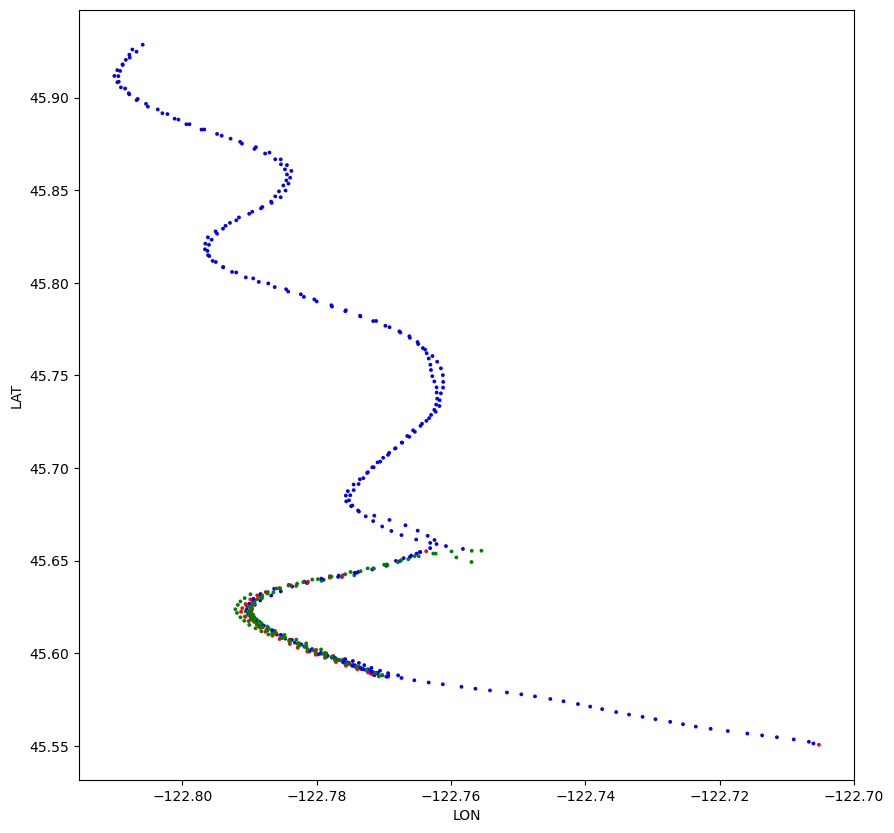

In [23]:
moving.iloc[-1000:-500].plot(kind='scatter', x='LON', y='LAT', figsize=(10,10), color=color_map[-1000:-500], s=3)
# plt.xlim(moving['LON'].min(), moving['LON'].max())
# plt.ylim(moving['LAT'].min(), moving['LAT'].max())
plt.show()

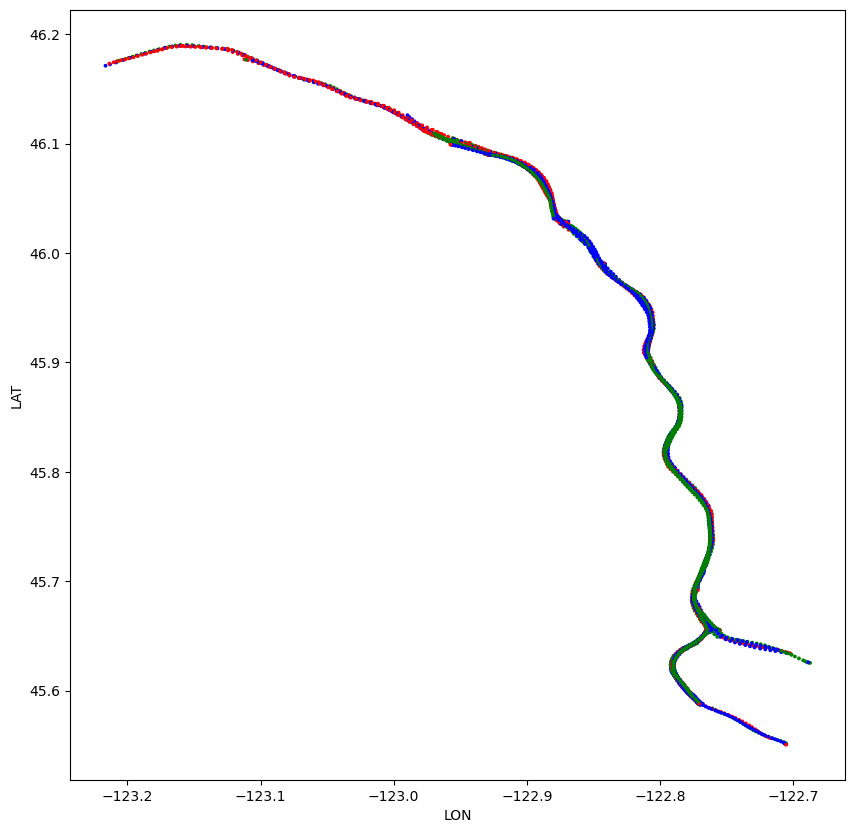

In [168]:
moving.plot(kind='scatter', x='LON', y='LAT', figsize=(10,10), color=color_map, s=3)
plt.show()

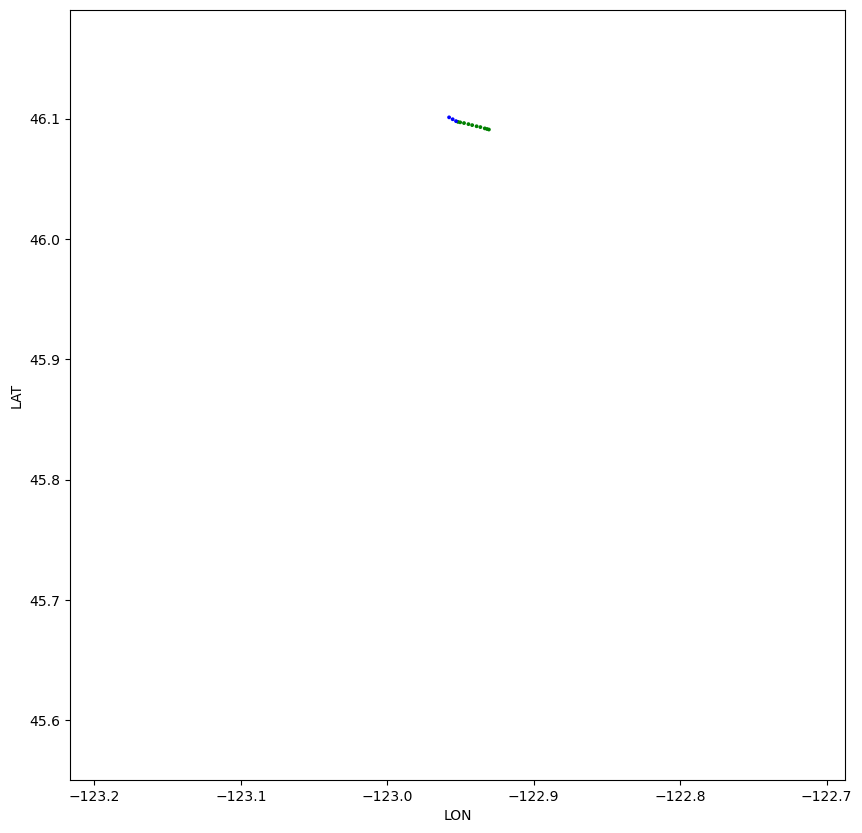

In [151]:
moving.iloc[1:14].plot(kind='scatter', x='LON', y='LAT', figsize=(10,10), color=color_map[1:14], s=3)
# moving.iloc[783:795].plot(kind='line', x='LON', y='LAT', figsize=(8,8), cmap='jet')
# moving.iloc[856:954].plot(kind='line', x='LON', y='LAT', figsize=(8,8), cmap='jet')
plt.xlim(moving['LON'].min(), moving['LON'].max())
plt.ylim(moving['LAT'].min(), moving['LAT'].max())
plt.show()